In [ ]:
# %pip install -q --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [3]:
# inport necessary libraries for the notebook
import pandas as pd

# importing libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# setting optiongs for pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 110530)

# Setting options to expand the display of the dataframe
pd.set_option('display.expand_frame_repr', True)

# Setting options to prevent silent downcasting of integers by using this code
pd.set_option('future.no_silent_downcasting', True)

In [21]:
# Reading the csv
df = pd.read_csv('../session-4/used_car_price_dataset_extended.csv')

In [22]:
# Displaying the first few rows of the dataframe
df.head(20)

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
5,2002,13.77,2500,Diesel,4,6856.03,BMW,Manual,Gray,Full,1,Yes
6,2023,12.50,1000,Petrol,3,6806.77,BMW,Manual,Red,Full,0,Yes
7,2015,17.46,2000,Diesel,5,7701.84,BMW,Manual,Blue,NaN,0,Yes
8,2001,14.99,5000,Diesel,2,8730.52,Tesla,Manual,Silver,Partial,1,No
9,2020,19.59,4000,Petrol,4,10812.16,Chevrolet,Automatic,White,Partial,0,Yes


In [15]:
# Peaking at the shape of the dataframe
df.shape

(10000, 12)

In [16]:
# Displaying the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [12]:
# Displaying the number of missing values in each column
df.isnull().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

Since there is so many rows missing data in the service history feature we could drop the nan values but that would affect the integrity of the data so we replace the nan values with "unknown"

In [28]:
df['service_history'].fillna('unkown', inplace=True)
df.head(20)

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,unkown,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,unkown,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
5,2002,13.77,2500,Diesel,4,6856.03,BMW,Manual,Gray,Full,1,Yes
6,2023,12.50,1000,Petrol,3,6806.77,BMW,Manual,Red,Full,0,Yes
7,2015,17.46,2000,Diesel,5,7701.84,BMW,Manual,Blue,unkown,0,Yes
8,2001,14.99,5000,Diesel,2,8730.52,Tesla,Manual,Silver,Partial,1,No
9,2020,19.59,4000,Petrol,4,10812.16,Chevrolet,Automatic,White,Partial,0,Yes


In [26]:
# Displaying the number of unique values in each column
df.nunique()

make_year               29
mileage_kmpl          2213
engine_cc               10
fuel_type                3
owner_count              5
price_usd             9906
brand                   10
transmission             2
color                    6
service_history          2
accidents_reported       6
insurance_valid          2
dtype: int64

In [27]:
# Checking for duplicate rows in the dataframe
df.duplicated().sum()

0

In [35]:
# Summarizing the Categorical columns
df.describe(include=['object']).T

,count,unique,top,freq
fuel_type,10000,3,Petrol,4968
brand,10000,10,Nissan,1089
transmission,10000,2,Manual,5985
color,10000,6,Gray,1705
service_history,10000,3,Full,4987
insurance_valid,10000,2,Yes,7934


In [30]:
# Summarizing the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
make_year,10000.0,2009.206900,8.373858,1995.0,2002.0000,2009.00,2016.0000,2023.00
mileage_kmpl,10000.0,17.960753,5.025486,5.0,14.5400,17.97,21.3525,35.00
engine_cc,10000.0,2287.130000,1291.276927,800.0,1200.0000,1800.00,3000.0000,5000.00
owner_count,10000.0,3.003500,1.418904,1.0,2.0000,3.00,4.0000,5.00
price_usd,10000.0,7179.754532,2795.270940,1000.0,5176.5475,6961.26,8993.7325,17647.63
accidents_reported,10000.0,0.492200,0.694109,0.0,0.0000,0.00,1.0000,5.00


In [37]:
df.corr(numeric_only=True)

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
make_year,1.000000,-0.013167,-0.017912,-0.021550,0.432603,-0.005151
mileage_kmpl,-0.013167,1.000000,-0.003222,-0.008310,0.211971,0.004567
engine_cc,-0.017912,-0.003222,1.000000,-0.000358,0.678161,-0.007750
owner_count,-0.021550,-0.008310,-0.000358,1.000000,-0.262266,-0.009365
price_usd,0.432603,0.211971,0.678161,-0.262266,1.000000,-0.001461
accidents_reported,-0.005151,0.004567,-0.007750,-0.009365,-0.001461,1.000000


We see here that there is a strong relation between engine cc and price but it doesn't exceed 0.7 so there is no need to drop any of the related features

In [39]:
# Displaying the first 5 unique values of each column to understand the data better
for col in df.columns:
    print(f'{col}: {df[col].unique()[:5]}')

make_year: [2001 2014 2023 2009 2005]
mileage_kmpl: [ 8.17 17.59 18.09 11.28 12.23]
engine_cc: [4000 1500 2500  800 1000]
fuel_type: ['Petrol' 'Diesel' 'Electric']
owner_count: [4 5 1 2 3]
price_usd: [8587.64 5943.5  9273.58 6836.24 4625.79]
brand: ['Chevrolet' 'Honda' 'BMW' 'Hyundai' 'Nissan']
transmission: ['Manual' 'Automatic']
color: ['White' 'Black' 'Blue' 'Red' 'Gray']
service_history: ['unkown' 'Full' 'Partial']
accidents_reported: [0 1 2 3 4]
insurance_valid: ['No' 'Yes']


In [40]:
# Converting Convert fields like insurance_valid, accidents_reported, owner_count to appropriate data types
df['accidents_reported'] = df['accidents_reported'].astype('int')
df['owner_count'] = df['owner_count'].astype('int')
df['make_year'] = pd.to_datetime(df['make_year'], format='%Y').dt.year

# Ensure fields like mileage_kmpl, price_usd, engine_cc are numeric.
df['mileage_kmpl'] = pd.to_numeric(df['mileage_kmpl'], errors='coerce')
df['engine_cc'] = pd.to_numeric(df['engine_cc'], errors='coerce')
df['price_usd'] = pd.to_numeric(df['price_usd'], errors='coerce')

In [46]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,unkown,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,unkown,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [47]:
print(df.dtypes)

make_year               int32
mileage_kmpl          float64
engine_cc               int64
fuel_type              object
owner_count             int32
price_usd             float64
brand                  object
transmission           object
color                  object
service_history        object
accidents_reported      int32
insurance_valid        object
dtype: object


Feature Engineering

In [51]:
# Create car_age = current_year - make_year
current_year = pd.to_datetime('now').year
# print(f'Current year: {current_year}')  # Output: Current year: 2025
df['car_age'] = current_year - df['make_year']
# Display the first few rows to verify the new column
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid,car_age
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,unkown,0,No,24
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,unkown,0,Yes,11
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes,2
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes,16
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes,20


In [52]:
# Categories for owner_count using pd.cut
owner_bins = [1, 2, 3, 4, float('inf')]
owner_labels = ['1 Owner', '2 Owners', '3 Owners', '4+ Owners']

df['owner_category'] = pd.cut(df['owner_count'], bins=owner_bins, labels=owner_labels, right=False)
# Display the first few rows to verify the new column
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid,car_age,owner_category
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,unkown,0,No,24,4+ Owners
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,unkown,0,Yes,11,4+ Owners
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes,2,4+ Owners
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes,16,1 Owner
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes,20,2 Owners


Now to encode categorical features

In [53]:
# (will do thais later for better visualisation and better EDA)
# Encoding transmition and insurance_valid as categorical variables
# df['transmission'] = df['transmission'].replace({'Manual': 0, 'Automatic': 1}).astype('int')
# df['insurance_valid'] = df['insurance_valid'].replace({'Yes': 1, 'No': 0}).astype('int')

# Encoding categorical variables using one-hot encoding (will do thais later for better visualisation and better EDA)
# df = pd.get_dummies(df, columns=['make_year', 'fuel_type', 'service_history', 'owner_category'], drop_first=True)

In [58]:
# To detect outliers, we can use the IQR method. First, we will calculate the IQR for the numerical columns.

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean DataFrame indicating outliers
# we must select numbers only because if used df alone it includes all columns numrical and categorical
outliers = (df.select_dtypes(include='number') < lower_bound) | (df.select_dtypes(include='number') > upper_bound)

# Count the number of outliers in each numerical column
outlier_counts = outliers.sum()

# Prepare the output
outlier_counts

make_year               0
mileage_kmpl           36
engine_cc               0
owner_count             0
price_usd              58
accidents_reported    130
car_age                 0
dtype: int64

We see the best approach is to cap the outliers

In [65]:
# Capping for mileage_kmpl
df['mileage_kmpl'] = df['mileage_kmpl'].clip(lower=5, upper=35)

# Capping for price_usd
df['price_usd'] = df['price_usd'].clip(lower=500, upper=200000)

# Capping for accidents_reported
df['accidents_reported'] = df['accidents_reported'].clip(upper=5)

Exploratory Data Analysis

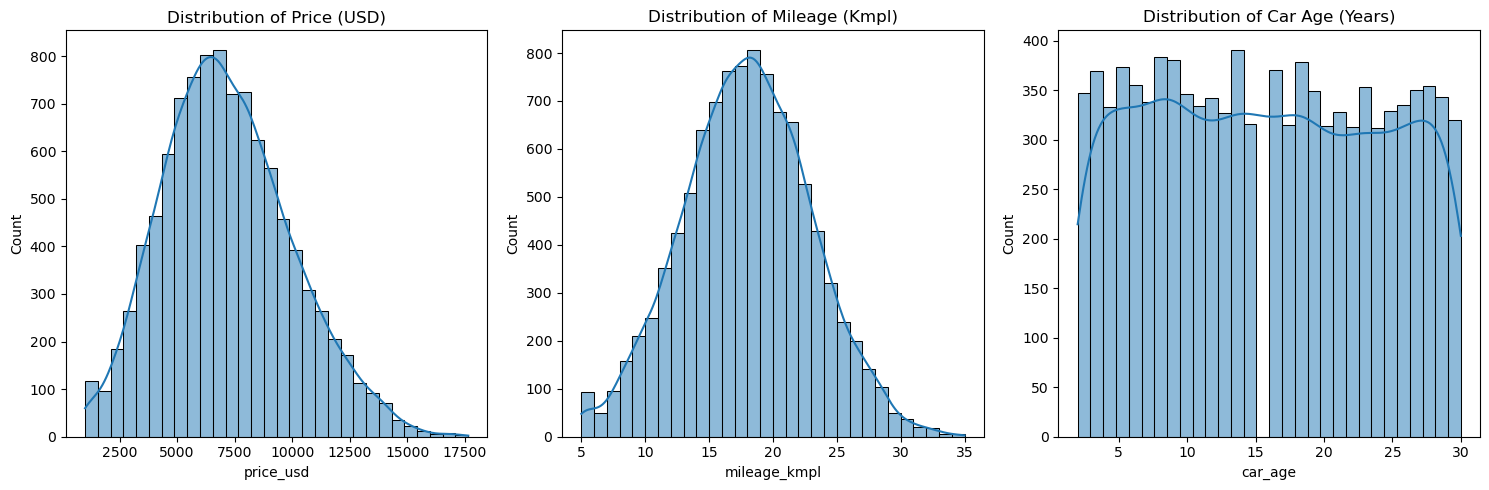

In [71]:
# EDA: Visualizing the distribution of numerical columns
# Histograms: price_usd, mileage_kmpl, car_age
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['price_usd'], bins=30, kde=True)
plt.title('Distribution of Price (USD)')

plt.subplot(1, 3, 2)
sns.histplot(df['mileage_kmpl'], bins=30, kde=True)
plt.title('Distribution of Mileage (Kmpl)')

plt.subplot(1, 3, 3)
sns.histplot(df['car_age'], bins=30, kde=True)
plt.title('Distribution of Car Age (Years)')

plt.tight_layout()
plt.show()

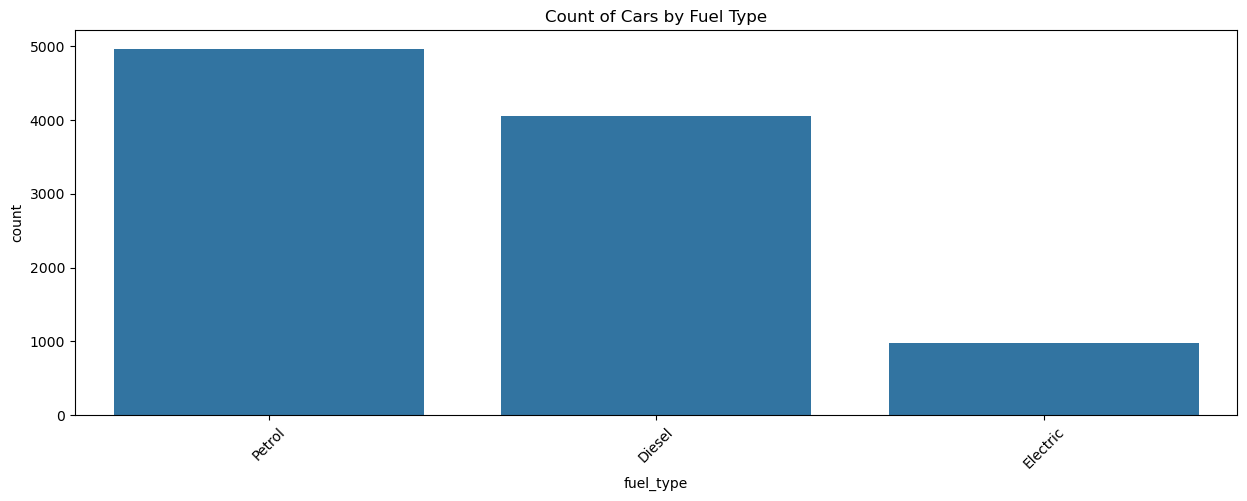

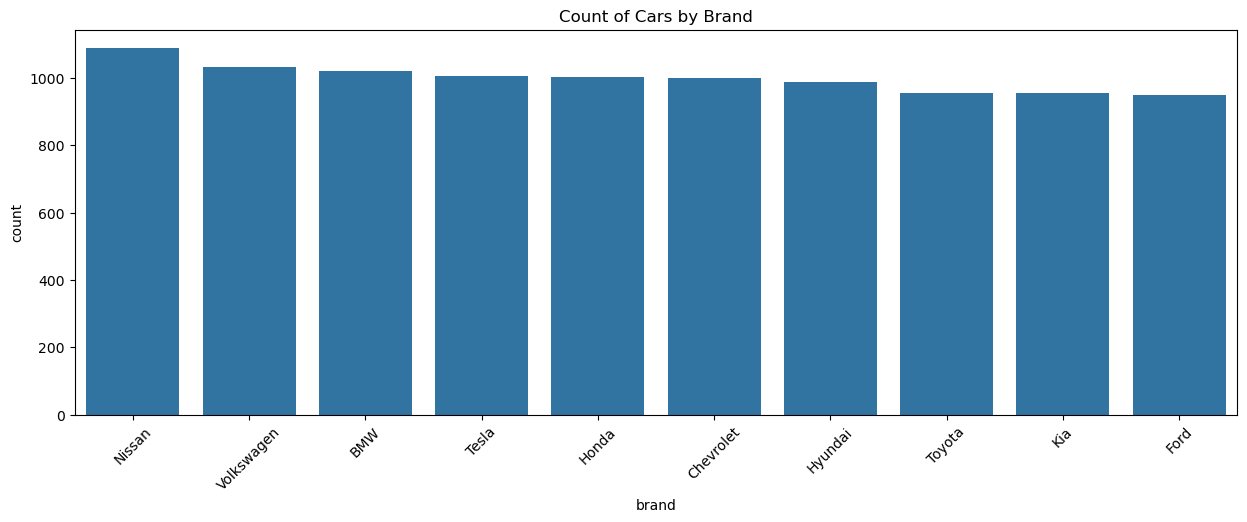

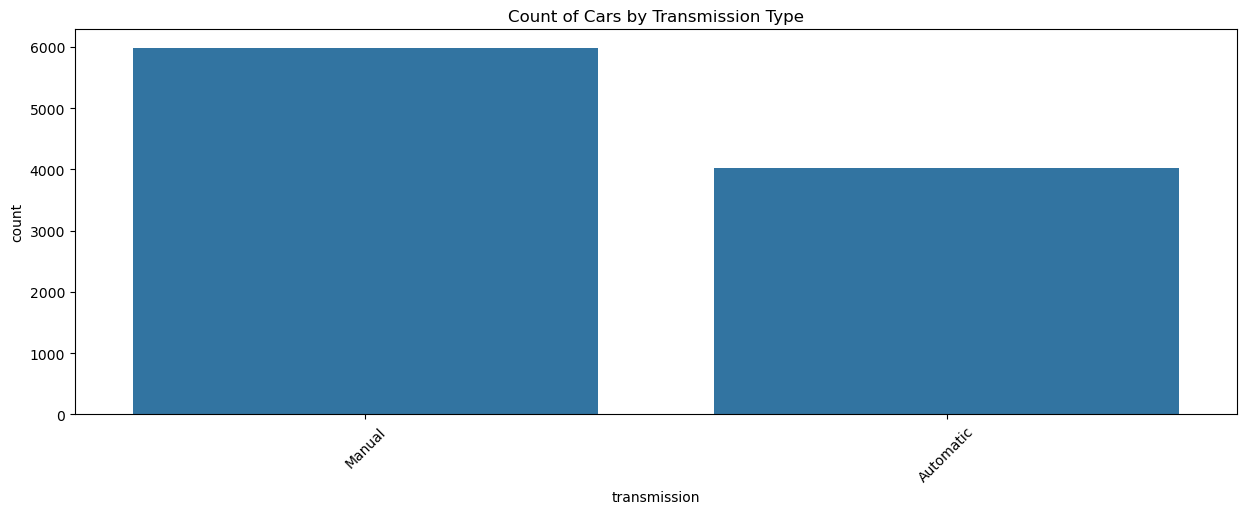

In [73]:
# Bar plots: fuel_type, brand, transmission
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='fuel_type', order=df['fuel_type'].value_counts().index)
plt.title('Count of Cars by Fuel Type')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index)
plt.title('Count of Cars by Brand')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='transmission', order=df['transmission'].value_counts().index)
plt.title('Count of Cars by Transmission Type')
plt.xticks(rotation=45)
plt.show()

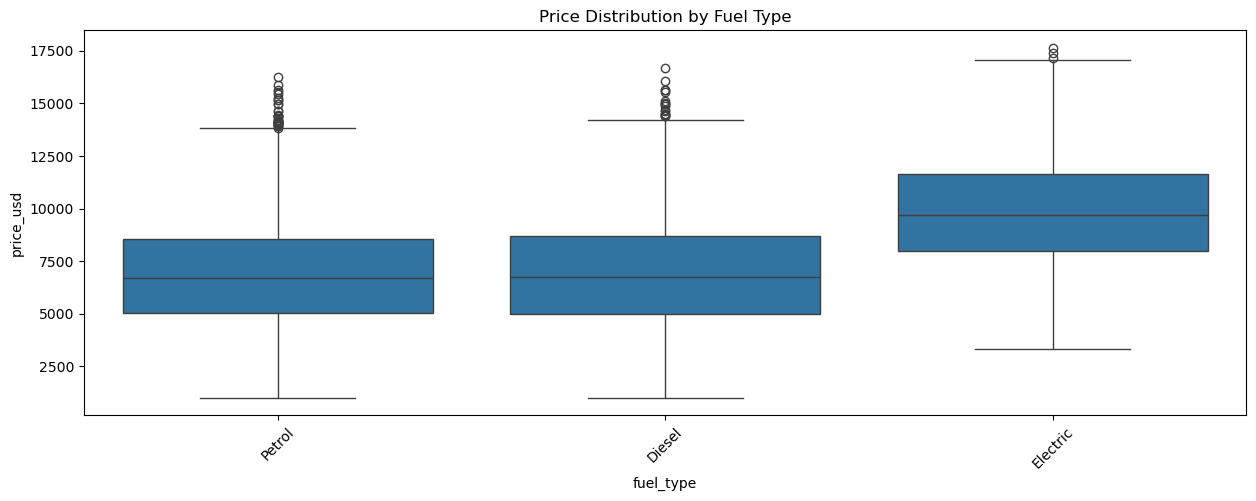

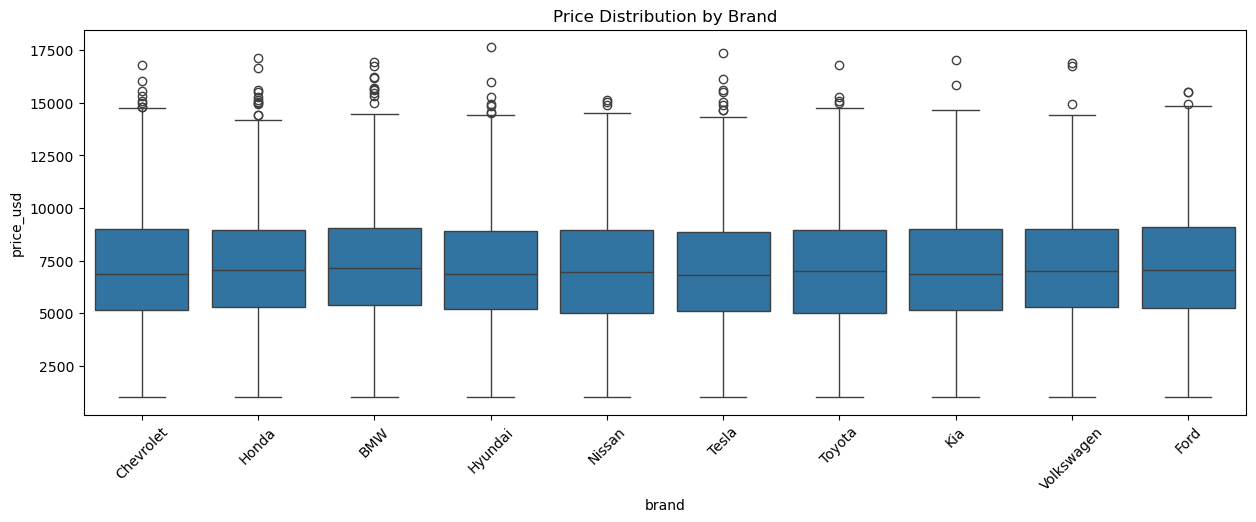

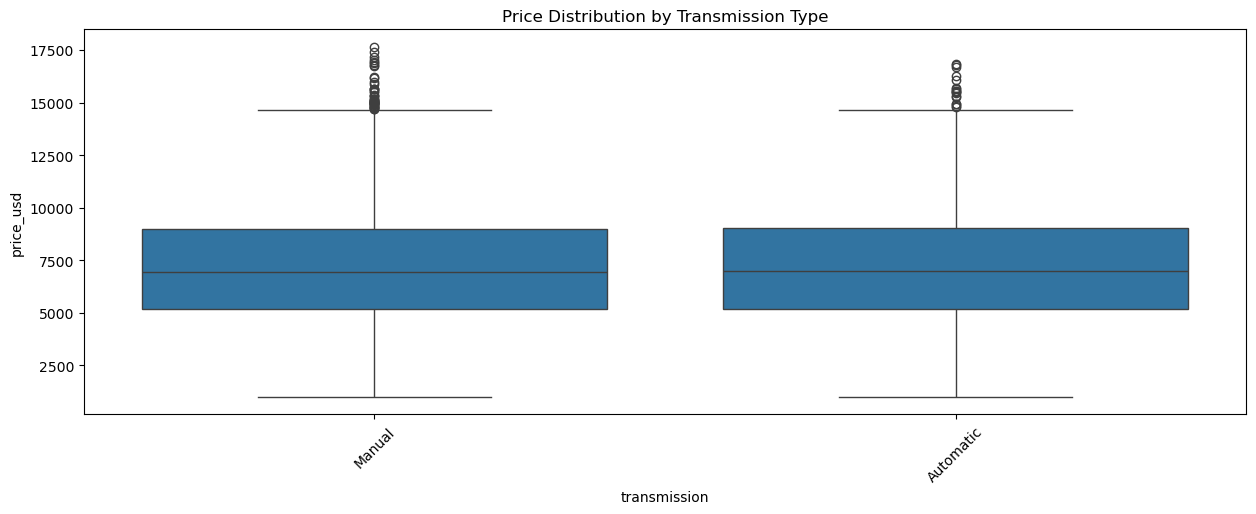

In [74]:
# Boxplots: Outlier detection per numerical variable.
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='fuel_type', y='price_usd')
plt.title('Price Distribution by Fuel Type')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='brand', y='price_usd')
plt.title('Price Distribution by Brand')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='transmission', y='price_usd')
plt.title('Price Distribution by Transmission Type')
plt.xticks(rotation=45)
plt.show()

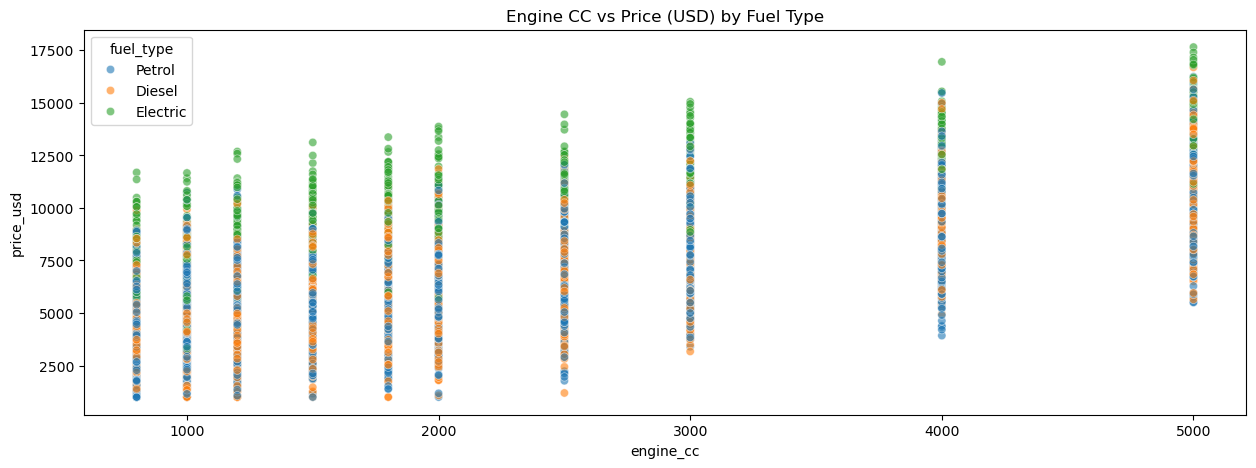

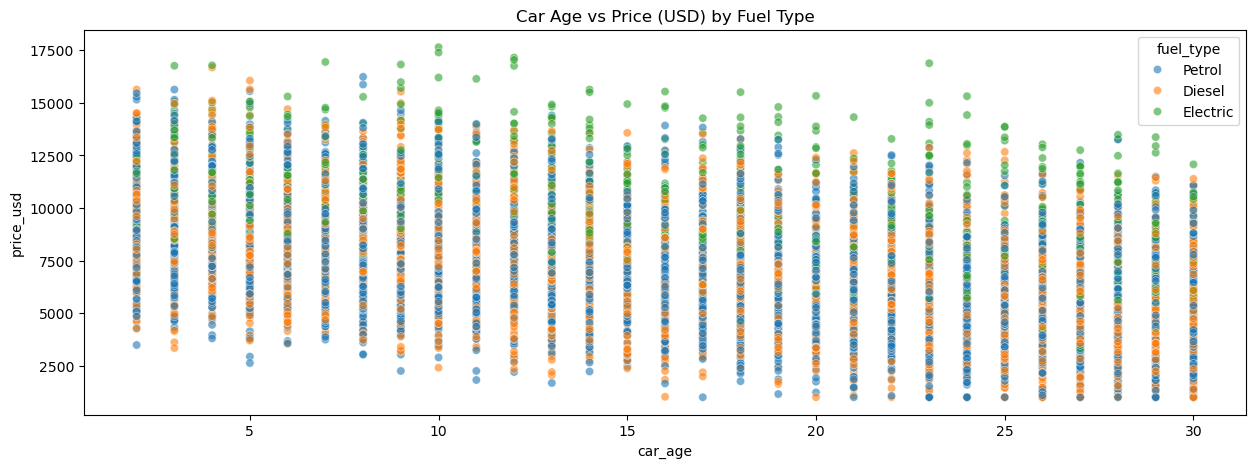

In [75]:
# Scatter plots: engine_cc vs price_usd, car_age vs price_usd.
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df, x='engine_cc', y='price_usd', hue='fuel_type', alpha=0.6)
plt.title('Engine CC vs Price (USD) by Fuel Type')
plt.show()
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df, x='car_age', y='price_usd', hue='fuel_type', alpha=0.6)
plt.title('Car Age vs Price (USD) by Fuel Type')
plt.show()

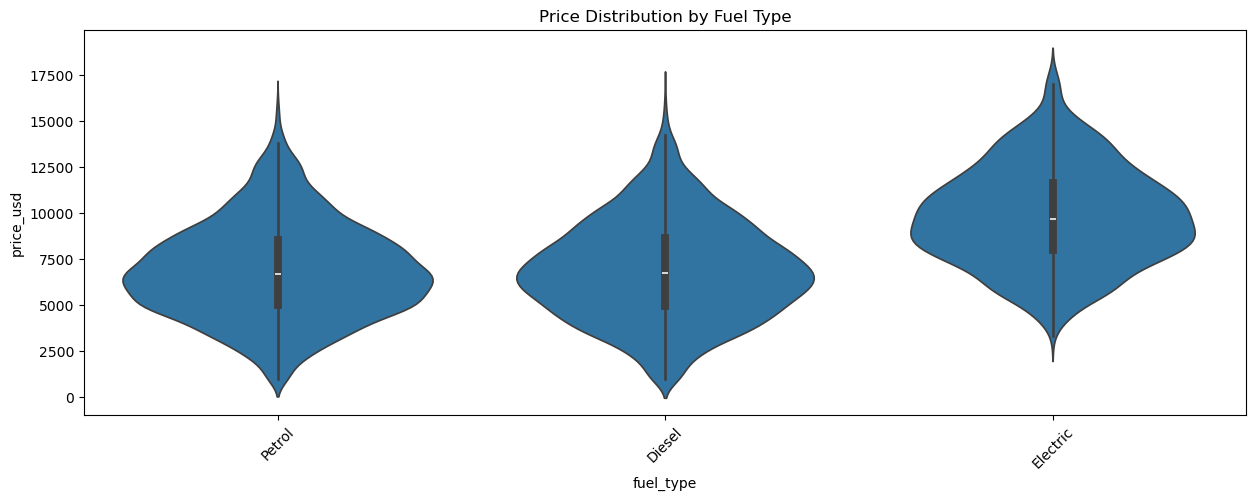

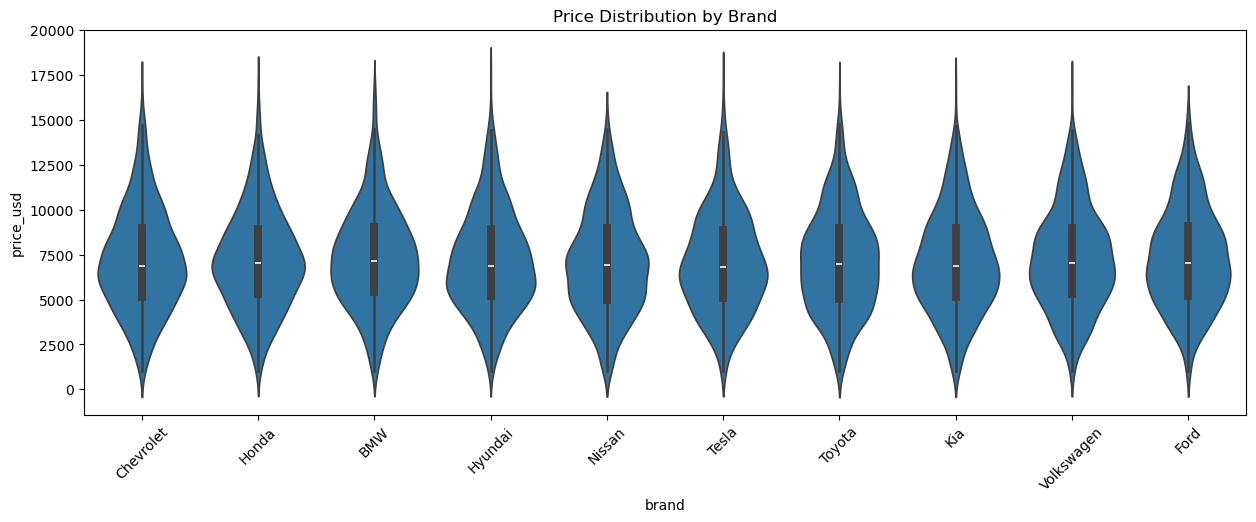

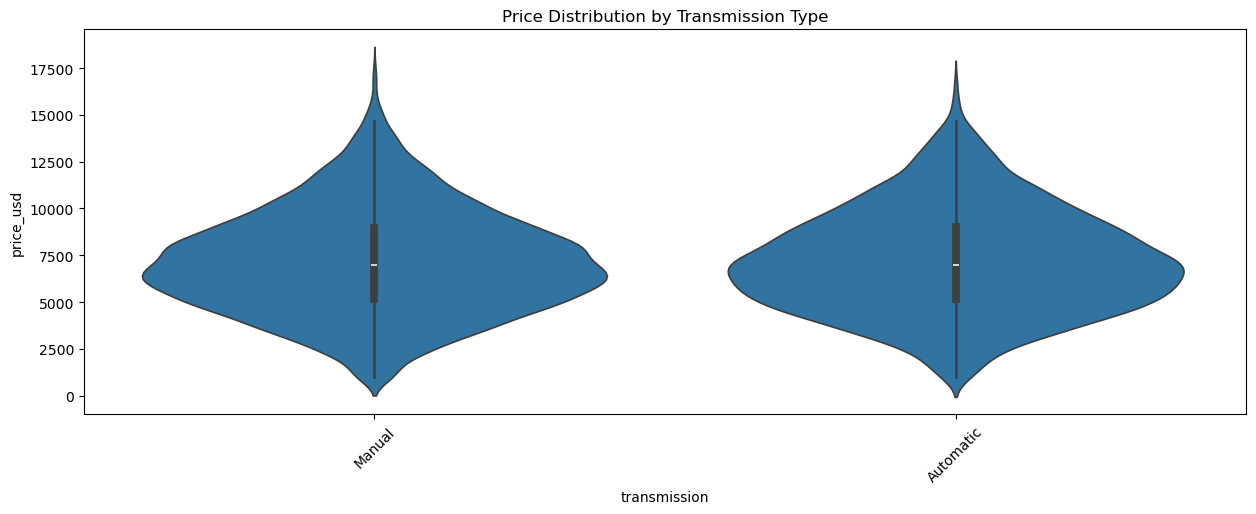

In [76]:
# Violin: price_usd distribution across categories like fuel_type, brand, transmission.
plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x='fuel_type', y='price_usd')
plt.title('Price Distribution by Fuel Type')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x='brand', y='price_usd')
plt.title('Price Distribution by Brand')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x='transmission', y='price_usd')
plt.title('Price Distribution by Transmission Type')
plt.xticks(rotation=45)
plt.show()


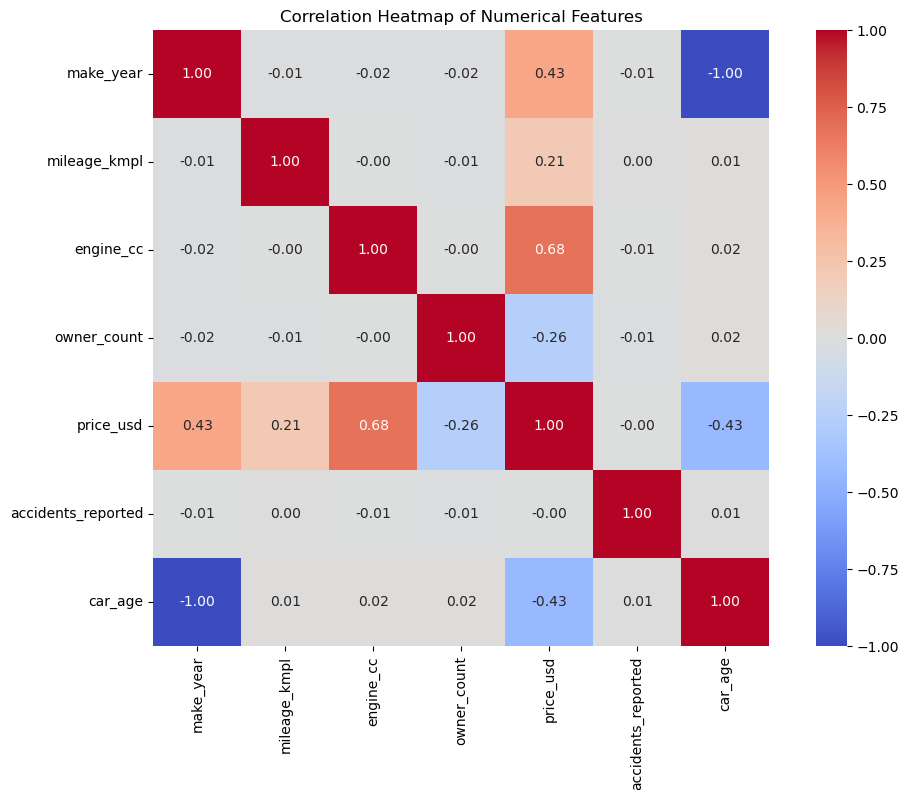

In [77]:
# Correlation heatmap: For numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

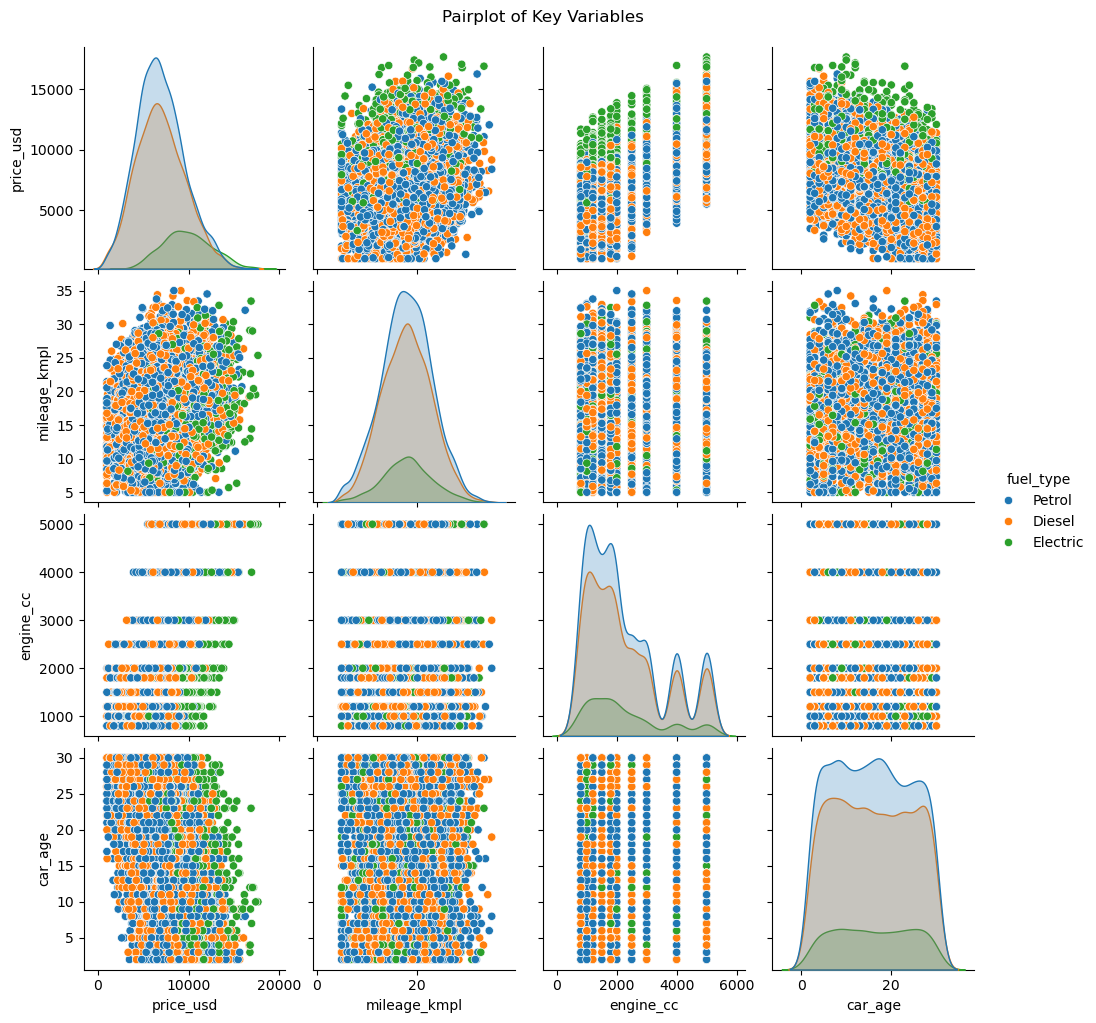

In [78]:
# Pairplot: Visualize relationships between key variables
sns.pairplot(df, vars=['price_usd', 'mileage_kmpl', 'engine_cc', 'car_age'], hue='fuel_type', diag_kind='kde')
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

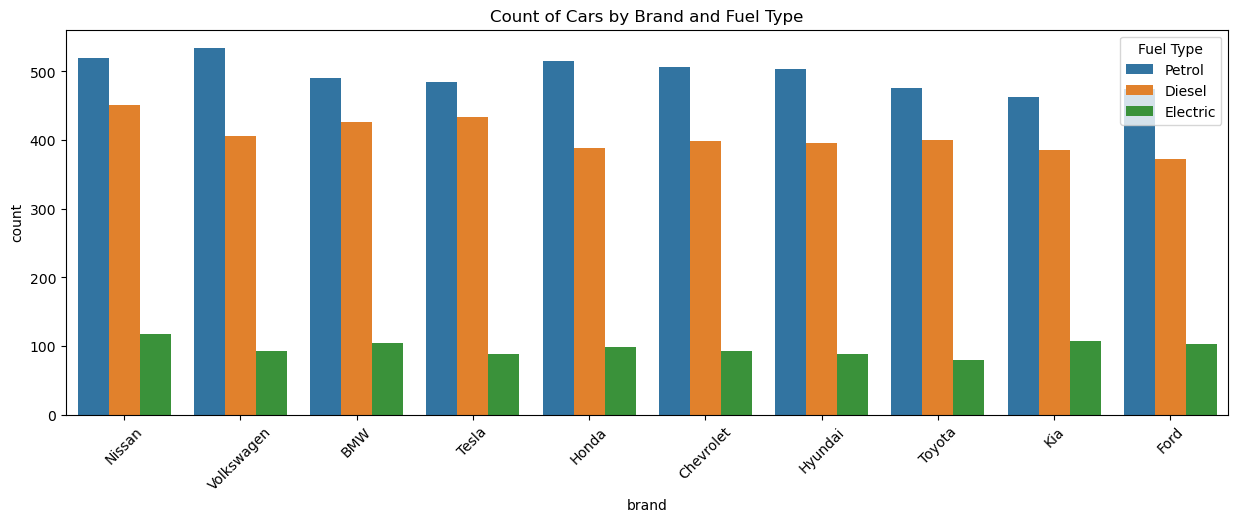

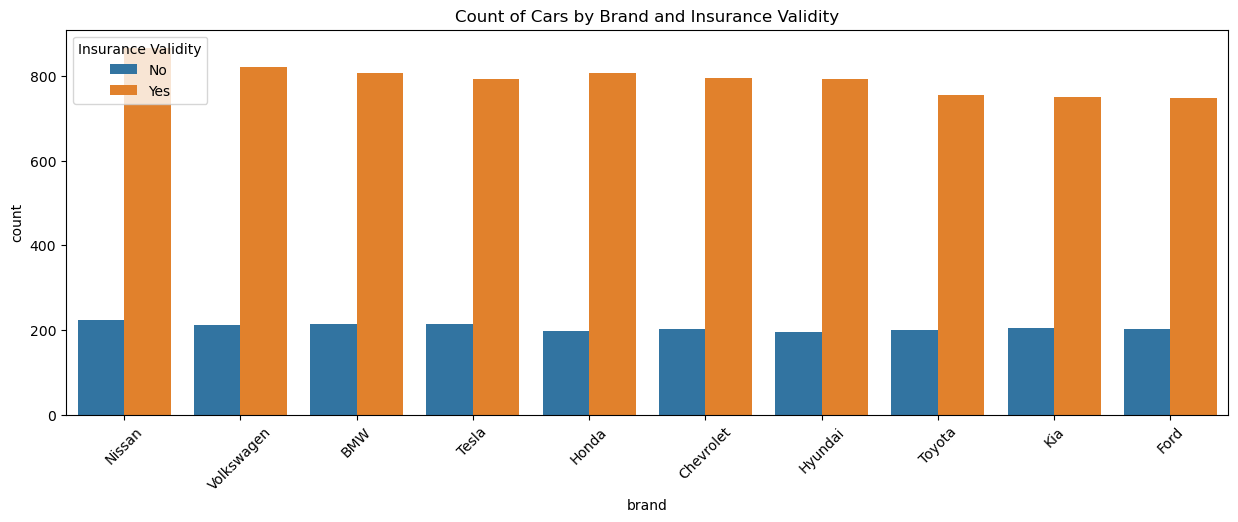

In [79]:
# Stacked bar charts: brand vs fuel_type vs insurance_valid
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='brand', hue='fuel_type', order=df['brand'].value_counts().index)
plt.title('Count of Cars by Brand and Fuel Type')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.show()
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='brand', hue='insurance_valid', order=df['brand'].value_counts().index)
plt.title('Count of Cars by Brand and Insurance Validity')
plt.xticks(rotation=45)
plt.legend(title='Insurance Validity')
plt.show()

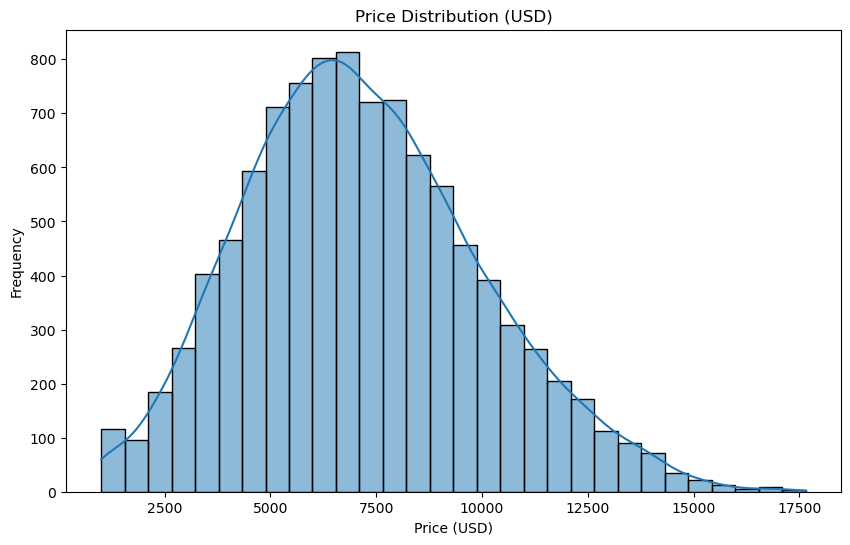

In [80]:
# Plot price_usd distribution histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['price_usd'], bins=30, kde=True)
plt.title('Price Distribution (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

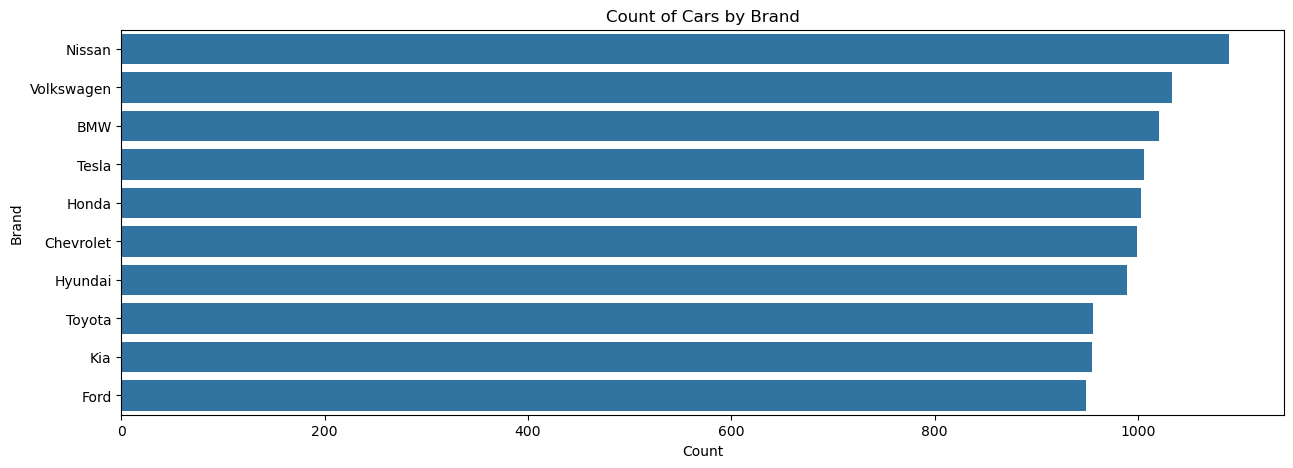

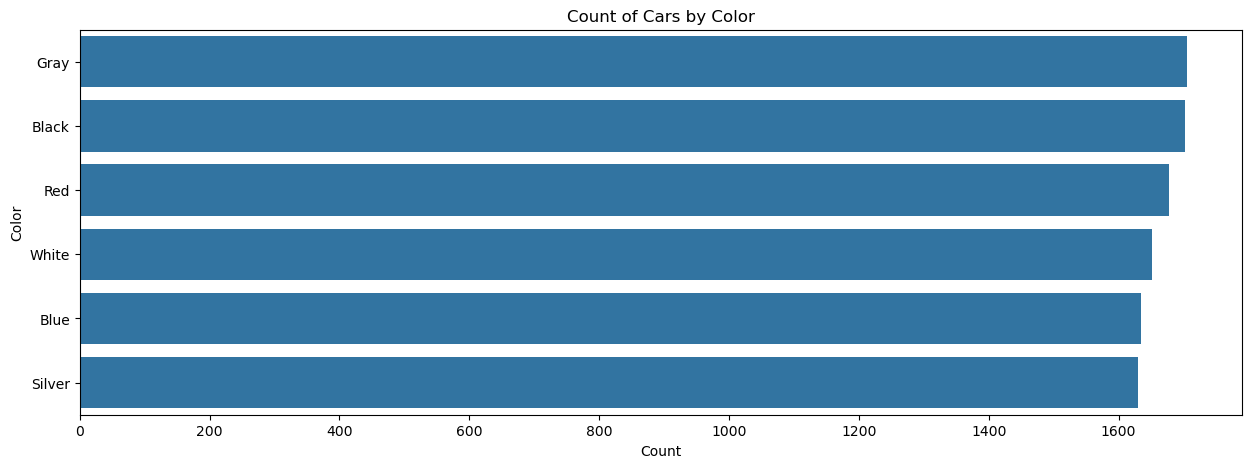

In [81]:
# Count plots for high-cardinality fields like brand, color.
plt.figure(figsize=(15, 5))
sns.countplot(data=df, y='brand', order=df['brand'].value_counts().index)
plt.title('Count of Cars by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

plt.figure(figsize=(15, 5))
sns.countplot(data=df, y='color', order=df['color'].value_counts().index)
plt.title('Count of Cars by Color')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()
